In [1]:
import pandas as pd
import numpy as np
#import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv";


df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
df = df.drop(["Holdeplass_Fra", "Holdeplass_Til","Linjetype","Linjefylke","Område","Fylke","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra", "Linjeretning", "Kommune", "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra", "TurId", "Kjøretøy_Kapasitet"], axis=1)

In [4]:
df.head(20)

,Dato,Linjenavn,Passasjerer_Ombord
0,10/08/2020,150,5
1,15/08/2020,150,5
2,03/08/2020,150,6
3,27/07/2020,150,10
4,27/08/2020,150,10
5,01/08/2020,31,8
6,28/07/2020,150,1
7,27/07/2020,150,-1
8,16/08/2020,150,2
9,13/08/2020,150,4


In [5]:
for index, row in df.iterrows():
    row['Passasjerer_Ombord'] = pd.to_numeric(row['Passasjerer_Ombord'])
    
    if row['Passasjerer_Ombord'] < 0:
        df.loc[index, 'Passasjerer_Ombord'] = row['Passasjerer_Ombord']*-1

In [6]:
df.loc[df['Linjenavn'] == "150"]

,Dato,Linjenavn,Passasjerer_Ombord
0,10/08/2020,150,5
1,15/08/2020,150,5
2,03/08/2020,150,6
3,27/07/2020,150,10
4,27/08/2020,150,10
...,...,...,...
5419,27/07/2020,150,1
5427,15/08/2020,150,1
5429,02/08/2020,150,3
5431,13/08/2020,150,2


In [7]:
df['Dato'] = pd.to_datetime(df['Dato'], errors="ignore", dayfirst="true" )
df = df.sort_values(by="Dato")
df.head(20)

,Dato,Linjenavn,Passasjerer_Ombord
976,2020-06-01,60,1
5093,2020-06-01,120,7
2247,2020-06-01,425,0
1649,2020-06-01,340,3
762,2020-06-01,365,3
5783,2020-06-01,31,15
4358,2020-06-01,420,14
5319,2020-06-01,100,9
483,2020-06-01,350,8
4123,2020-06-01,381,0


In [8]:
df.groupby('Dato')['Passasjerer_Ombord'].sum().reset_index()

,Dato,Passasjerer_Ombord
0,2020-06-01,152
1,2020-06-02,273
2,2020-06-03,335
3,2020-06-04,402
4,2020-06-05,399
...,...,...
85,2020-08-26,682
86,2020-08-27,530
87,2020-08-28,551
88,2020-08-29,297


In [9]:
df['Dato'] = pd.to_datetime(df['Dato'])
df['Dag'] = df['Dato'].dt.dayofweek

In [10]:
corrMatrix = df.corr(method='pearson')
corrMatrix.style.background_gradient(cmap='coolwarm')

,Passasjerer_Ombord,Dag
Passasjerer_Ombord,1.000000,-0.027871
Dag,-0.027871,1.000000


<AxesSubplot:xlabel='Dag', ylabel='Passasjerer_Ombord'>

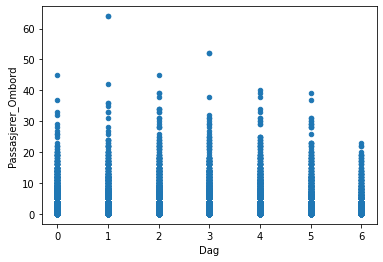

In [11]:
df.plot.scatter(x = 'Dag', y = 'Passasjerer_Ombord')